In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import  XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

In [2]:
df = pd.read_csv('House Price India.csv')

In [3]:
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  int64  
 2   number of bedrooms                     14620 non-null  int64  
 3   number of bathrooms                    14620 non-null  float64
 4   living area                            14620 non-null  int64  
 5   lot area                               14620 non-null  int64  
 6   number of floors                       14620 non-null  float64
 7   waterfront present                     14620 non-null  int64  
 8   number of views                        14620 non-null  int64  
 9   condition of the house                 14620 non-null  int64  
 10  grade of the house                     14620 non-null  int64  
 11  Ar

In [5]:
df.isnull().sum()

id                                       0
Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int6

In [6]:
df.describe()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
count,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,...,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04
mean,6.762821e+09,42604.538646,3.379343,2.129583,2098.262996,1.509328e+04,1.502360,0.007661,0.233105,3.430506,...,1970.926402,90.924008,122033.062244,52.792848,-114.404007,1996.702257,12753.500068,2.012244,64.950958,5.389322e+05
std,6.237575e+03,67.347991,0.938719,0.769934,928.275721,3.791962e+04,0.540239,0.087193,0.766259,0.664151,...,29.493625,416.216661,19.082418,0.137522,0.141326,691.093366,26058.414467,0.817284,8.936008,3.675324e+05
min,6.762810e+09,42491.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,1900.000000,0.000000,122003.000000,52.385900,-114.709000,460.000000,651.000000,1.000000,50.000000,7.800000e+04
25%,6.762815e+09,42546.000000,3.000000,1.750000,1440.000000,5.010750e+03,1.000000,0.000000,0.000000,3.000000,...,1951.000000,0.000000,122017.000000,52.707600,-114.519000,1490.000000,5097.750000,1.000000,57.000000,3.200000e+05
50%,6.762821e+09,42600.000000,3.000000,2.250000,1930.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,...,1975.000000,0.000000,122032.000000,52.806400,-114.421000,1850.000000,7620.000000,2.000000,65.000000,4.500000e+05
75%,6.762826e+09,42662.000000,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,...,1997.000000,0.000000,122048.000000,52.908900,-114.315000,2380.000000,10125.000000,3.000000,73.000000,6.450000e+05
max,6.762832e+09,42734.000000,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,...,2015.000000,2015.000000,122072.000000,53.007600,-113.505000,6110.000000,560617.000000,3.000000,80.000000,7.700000e+06


In [7]:
df=df.drop(columns=['id','Date'])

In [8]:
df

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,5,2.50,3650,9050,2.0,0,4,5,10,3370,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,4,2.50,2920,4000,1.5,0,0,5,8,1910,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,5,2.75,2910,9480,1.5,0,0,3,8,2910,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,4,2.50,3310,42998,2.0,0,0,3,9,3310,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,3,2.00,2710,4500,1.5,0,0,4,8,1880,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,2,1.50,1556,20000,1.0,0,0,4,7,1556,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14616,3,2.00,1680,7000,1.5,0,0,4,7,1680,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14617,2,1.00,1070,6120,1.0,0,0,3,6,1070,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14618,4,1.00,1030,6621,1.0,0,0,4,6,1030,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000


In [9]:
df.columns = df.columns.str.lower()

In [10]:
df.head()

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,area of the house(excluding basement),...,built year,renovation year,postal code,lattitude,longitude,living_area_renov,lot_area_renov,number of schools nearby,distance from the airport,price
0,5,2.50,3650,9050,2.0,0,4,5,10,3370,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,4,2.50,2920,4000,1.5,0,0,5,8,1910,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,5,2.75,2910,9480,1.5,0,0,3,8,2910,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,4,2.50,3310,42998,2.0,0,0,3,9,3310,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,3,2.00,2710,4500,1.5,0,0,4,8,1880,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


In [11]:
df.columns

Index(['number of bedrooms', 'number of bathrooms', 'living area', 'lot area',
       'number of floors', 'waterfront present', 'number of views',
       'condition of the house', 'grade of the house',
       'area of the house(excluding basement)', 'area of the basement',
       'built year', 'renovation year', 'postal code', 'lattitude',
       'longitude', 'living_area_renov', 'lot_area_renov',
       'number of schools nearby', 'distance from the airport', 'price'],
      dtype='object')

Text(0.5, 1.0, 'Price Distribution')

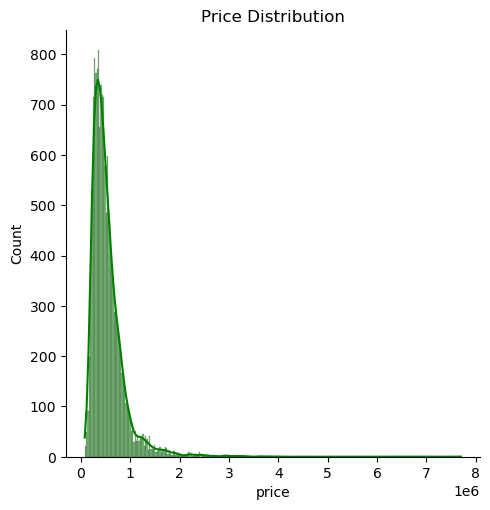

In [12]:
sns.displot(df.price, kde=True, color='green')
plt.title('Price Distribution')

In [14]:
X = df.drop(columns=['price'])
y=df['price']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,area of the house(excluding basement),area of the basement,built year,renovation year,postal code,lattitude,longitude,living_area_renov,lot_area_renov,number of schools nearby,distance from the airport
6459,3,2.50,2500,51836,1.0,0,0,3,9,1510,990,2013,0,122012,52.6994,-114.179,2270,54450,3,51
10885,4,1.75,1275,20000,1.0,0,0,4,6,1275,0,1991,0,122069,52.6096,-114.680,1660,20000,2,76
1369,4,1.50,1930,15531,2.0,0,0,3,7,1930,0,1979,0,122040,52.5750,-114.486,1580,7800,1,80
740,2,1.00,700,6000,1.0,0,0,4,6,700,0,1949,0,122014,52.9815,-114.506,920,6000,1,62
3474,4,2.25,2210,9371,2.0,0,0,4,8,2210,0,1968,0,122066,52.5934,-114.469,2300,11584,3,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,4,2.50,2500,8540,2.0,0,0,3,9,2500,0,1990,0,122011,52.8059,-114.184,2560,8475,1,61
13418,3,1.00,1340,10035,1.0,0,0,3,7,1340,0,1959,0,122063,52.7216,-114.444,2090,10035,1,50
5390,3,2.25,3270,168000,2.0,0,0,4,10,3270,0,1982,0,122053,52.7497,-114.381,3220,7963,2,52
860,2,2.50,1310,1500,2.0,0,0,3,8,1160,150,2006,0,122044,52.8412,-114.499,1320,1581,1,61


In [18]:
y_train

6459     650000
10885    309600
1369     275000
740      267800
3474     305000
          ...  
5191     639000
13418    227000
5390     750000
860      500000
7270     410000
Name: price, Length: 11696, dtype: int64

In [20]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'XGB Regressor': XGBRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    mae_train = mean_absolute_error(y_train, y_train_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)

    mae_test = mean_absolute_error(y_test, y_test_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)


    print(f'{"="*35}')
    print(f'Model: {name}')
    print(f'Training MAE: {mae_train}')
    print(f'Training MSE: {mse_train}')
    print(f'Training MAPE: {mape_train}')
    print(f'Training r2_score:{r2_train}')
    print("-"*35)
    print(f'Testing MAE: {mae_test}')
    print(f'Testing MSE: {mse_test}')
    print(f'Testing MAPE: {mape_test}')
    print(f'Training r2_score:{r2_test}')
    print('\n')


Model: Linear Regression
Training MAE: 124301.40354702994
Training MSE: 40324729313.15255
Training MAPE: 0.2518303248921619
Training r2_score:0.6981731222990045
-----------------------------------
Testing MAE: 124764.68391406795
Testing MSE: 39628637140.88526
Testing MAPE: 0.2485350687374624
Training r2_score:0.7187841873084779


Model: Decision Tree
Training MAE: 0.0
Training MSE: 0.0
Training MAPE: 0.0
Training r2_score:1.0
-----------------------------------
Testing MAE: 98113.40902872776
Testing MSE: 36001173570.72504
Testing MAPE: 0.17442935310802976
Training r2_score:0.7445256760269747


Model: XGB Regressor
Training MAE: 34623.05061960286
Training MSE: 2314294397.912499
Training MAPE: 0.07741154663199022
Training r2_score:0.9826777199971184
-----------------------------------
Testing MAE: 66437.00896406891
Testing MSE: 17356959284.871952
Testing MAPE: 0.12129375267259959
Training r2_score:0.8768301974706797




In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}


In [22]:
grid_search = GridSearchCV(
    estimator=XGBRegressor(),
    param_grid=param_grid,
    scoring='r2',
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1  # Use all available cores
)

grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)


Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best Hyperparameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}
Best R2 Score: 0.8865522135303877


In [23]:
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)

# Calculate metrics
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Testing MAE: {test_mae}")
print(f"Testing MSE: {test_mse}")
print(f"Testing MAPE: {test_mape}")
print(f"Testing R2 Score: {test_r2}")


Testing MAE: 64545.3819655224
Testing MSE: 15309735337.20616
Testing MAPE: 0.11772532324732769
Testing R2 Score: 0.8913578670485571


In [33]:
import pickle

# Assuming your trained model is named 'best_model'
# Save the model to a file in the current directory
with open('House_prediction.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Model saved to 'House_prediction'")


FileNotFoundError: [Errno 2] No such file or directory: 'House_prediction.pkl'